<a href="https://colab.research.google.com/github/Betson1/MachineLearning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%9D%D0%B5%D1%81%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B4%D0%B0%D1%82%D0%B0_%D1%81%D0%B5%D1%82_2_Part_2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> ФМИ. Disbalanced dataset.  Part 2 </h1>
<h1 align="center"> Credit card Fraud Detector </h1>


<h2> Введение </h2>

На данном семинаре мы будем реализовывать различные прогностические модели, чтобы проверить, насколько точно они определяют, является ли транзакция обычным платежом (non Fraud) или мошенничеством (Fraud).

<h4> По мотивам кейса, рассмотренного в Зимней школе СберУнивера </h4>

<h2> Наши цели: </h2>
<ul>
<li> Проанализировать полученные данные.</li>
<li> Решить проблему сильного дисбаланса классов.  </li>
<li>Построить модели на основе классических алгоритмов машинного обучения. </li>
<li> Провести сравнительный анализ классических подходов.</li>

## Описание данных и постановка задачи:
**Задача:** см ФМИ. Disbalanced dataset.Part 1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

Подключимся к диску для загрузки данных.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загружаем данные.

In [ ]:
# Будем загружать данные, полученные в предыдущем блокноте.
# См обновленный блокнот

new_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_short.csv')
new_df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,70589,53937.0,-2.042608,1.573578,-2.372652,-0.572676,-2.097353,-0.174142,-3.039520,-1.634233,...,-0.723326,0.501222,-0.696892,-0.600514,0.127547,-0.786072,0.606097,0.171697,261.87,1
1,136177,81581.0,0.939965,-0.682533,-0.918032,0.071346,-0.107304,-0.818749,0.604147,-0.295210,...,0.008891,-0.559274,-0.389090,-0.527131,0.535193,1.111285,-0.170398,0.017942,240.00,0
2,40525,40276.0,1.159373,2.844795,-4.050680,4.777701,2.948980,-2.010361,1.744086,-0.410287,...,-0.176541,-0.433470,-0.529323,-0.597020,1.335954,0.547092,0.009979,0.160769,1.00,1
3,46909,42985.0,-4.075975,0.963031,-5.076070,4.955963,-0.161437,-2.832663,-7.619765,1.618895,...,1.030738,0.165328,-1.017502,-0.477983,-0.304987,-0.106089,1.899714,0.511462,1.00,1
4,1463,1138.0,-0.884587,1.336728,1.474769,1.115729,-0.121490,-0.209224,0.727249,-0.085613,...,-0.110007,0.213653,-0.181993,0.514580,-0.044060,-0.311318,0.321134,0.095912,10.99,0


In [ ]:
new_df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,...,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,127074.654809,85516.193676,-2.939872,2.394980,-4.535554,2.955093,-2.056628,-0.934228,-3.582944,0.394947,...,0.456565,-0.003733,-0.021676,-0.062654,0.021506,0.030624,0.108905,0.051802,99.075283,0.648221
std,84232.020963,48231.804576,6.055515,3.864499,6.695698,3.201168,4.605926,1.756836,6.412498,5.485194,...,3.139216,1.270826,1.282230,0.553882,0.697757,0.487487,1.119753,0.448171,217.877598,0.477840
min,218.000000,144.000000,-30.552380,-8.402154,-31.103685,-2.037224,-22.105532,-6.406267,-43.557242,-41.044261,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.236616,-7.263482,-1.869290,0.000000,0.000000
25%,45974.000000,42584.000000,-3.820076,0.067594,-6.030152,0.339363,-2.489999,-1.879513,-4.320997,-0.196899,...,-0.138530,-0.545713,-0.264722,-0.409631,-0.307535,-0.283117,-0.055064,-0.062011,1.000000,0.000000
50%,124501.000000,77315.000000,-1.011493,1.265445,-2.238338,2.213085,-0.618778,-0.828496,-1.019874,0.210612,...,0.249023,0.003026,-0.037145,0.007102,0.036082,-0.010091,0.086818,0.047666,15.990000,1.000000
75%,198915.000000,132710.000000,0.916126,3.410852,-0.159963,5.330797,0.389714,-0.099035,0.164029,1.099374,...,0.869535,0.593374,0.210720,0.367099,0.394096,0.348983,0.545335,0.264484,99.990000,1.000000
max,283877.000000,171944.000000,2.334682,22.057729,3.030952,12.114672,11.095089,6.474115,5.802537,20.007208,...,27.202839,8.361985,5.466230,1.212430,2.208209,2.745261,3.052358,1.779364,2125.870000,1.000000


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard_full.csv')
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,21745,31837.0,-12.229231,7.388908,-12.396635,2.210933,-7.684040,-2.642237,-4.910167,8.147966,...,-0.036763,-1.178162,-0.093117,0.072280,0.685770,-0.350311,-0.170591,-0.338217,89.99,0
1,227163,144958.0,0.702246,0.165645,1.014684,1.259422,-0.971483,0.332698,-0.814238,-0.748197,...,0.981016,0.595286,-0.148397,-0.080007,0.241097,1.272042,0.229515,0.263589,29.95,0
2,68582,53049.0,0.889323,-0.542552,1.739121,1.692757,-1.596104,-0.013061,-0.830380,0.190530,...,0.258869,0.775343,-0.162236,0.745922,0.376327,-0.204928,0.076637,0.064459,116.11,0
3,152126,96922.0,2.034938,-0.461451,-2.408023,-0.636994,2.318038,3.529711,-0.725864,0.747724,...,-0.072768,0.247721,0.085177,0.702142,0.212765,0.176648,-0.034130,-0.075234,6.03,0
4,4238,3754.0,1.374820,-0.358655,0.701164,-0.450366,-1.042462,-0.991103,-0.598109,-0.295170,...,-0.232280,-0.572940,0.127239,0.299814,0.208493,-0.522076,-0.018410,0.019863,27.10,0


In [ ]:
df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,142403.000000,94813.859575,1.177756e-15,3.383976e-16,-1.399096e-15,2.095950e-15,1.005014e-15,1.494997e-15,-5.627320e-16,1.150612e-16,...,1.609659e-16,-3.511711e-16,2.627671e-16,4.472442e-15,5.147815e-16,1.685352e-15,-3.657409e-16,-1.227016e-16,88.349619,0.001727
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,71201.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,142403.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,213604.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,284806.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<h3 style="text-align: center;">Материалы для изучения scikit-learn:<b></b></h3>

*1) Официальный сайт с подробными описаниями моделей и методов : https://scikit-learn.org/stable/user_guide.html*

*2) Полезный репозиторий с блокнотами: https://github.com/gmonce/scikit-learn-book*

*3) Хороший курс с упражнениями: https://inria.github.io/scikit-learn-mooc/*

In [ ]:
'''
Работаем с маленьким датасетом new_df
Делаем из него 2 набора.
В первом - все столбцы, но нет целевой переменной.
Во втором - столбец с целевой переменной.
'''


X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
# Про масштабирование мы с вами уже в курсе. Опять используем RobustScaler

from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify = y)

X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['scaled_amount'] = rob_scaler.fit_transform(X_test['Amount'].values.reshape(-1,1))

X_train['scaled_time'] = rob_scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['scaled_time'] = rob_scaler.fit_transform(X_test['Time'].values.reshape(-1,1))


# удаляем из трейн и тест датасетов  столбцы Time и Amount,
# так как у нас уже есть их отмасштабированные версии
X_train.drop(['Time','Amount'], axis=1, inplace=True)
X_test.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
# Переводим данные в массив для подачи в классификатор
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Выберем несколько простых моделей из библиотеки sklearn

classifiers = {
    "LogisiticRegression": LogisticRegression(),  # Логистическая регрессия
    "KNearest": SVC(),  # Метод опорных векторов
    "Support Vector Classifier": KNeighborsClassifier(),# Метод ближайших соседей
    "DecisionTreeClassifier": DecisionTreeClassifier() # Решающее дерево
}

Для борьбы с переобучением будем использовать кросс-валидацию.

<img src="https://scikit-learn.ru/wp-content/uploads/2021/10/image-161.png" width=800>

Разобьем обучающую выборку на 5 фолдов и обучим наши модели.

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    #classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Модель ", classifier.__class__.__name__, "получила на обучающей выборке", round(training_score.mean(), 2) * 100, "% accuracy score")

Модель  LogisticRegression получила на обучающей выборке 96.0 % accuracy score
Модель  SVC получила на обучающей выборке 65.0 % accuracy score
Модель  KNeighborsClassifier получила на обучающей выборке 69.0 % accuracy score
Модель  DecisionTreeClassifier получила на обучающей выборке 94.0 % accuracy score


Строим собственную модель градиентного бустинга и проверяем ее на кросс-валидации

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Создание и обучение модели
model = GradientBoostingClassifier(
    n_estimators=100,        # Количество деревьев
    max_depth=3,             # Максимальная глубина деревьев
    learning_rate=0.1,       # Скорость обучения
    subsample=0.8,           # Доля выборки для обучения каждого дерева
    random_state=42          # Фиксация результата
)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)
print("Модель XGBClassifier получила на обучающей выборке", round(scores.mean()*100,2), "% accuracy score")

Модель XGBClassifier получила на обучающей выборке 96.04 % accuracy score


Для улучшения качества моделей переберем по сетке различные гиперпараметры методом GridSearchCV.


In [ ]:
# Используем поиск по сетке для подбора гиперпараметров
from sklearn.model_selection import GridSearchCV

# Логистическая регрессия
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# Выбираем лучшую модель
log_reg = grid_log_reg.best_estimator_ #  для Логистическая регрессия

# Метод ближайших соседей
knears_params = {"n_neighbors": list(range(2,7,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_# для  K ближайший соседей

# Метод опорных векторов
x = [1.0, 1000.0]
y = [0.9]
z = [4]
svc_params=[
            {'C': x,'kernel': ['rbf'],'gamma': y} ,
            {'C': x,'kernel': ['poly'],'gamma': y,'degree': z}
           ]
grid_svc=GridSearchCV(estimator = SVC(),
                        param_grid = svc_params,
                        scoring='accuracy',
                        cv=3,
                        n_jobs=-1)

grid_svc.fit(X_train, y_train)

svc = grid_svc.best_estimator_#  для SVM

# Решающее дерево
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,7,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

tree_clf = grid_tree.best_estimator_#  для решающий деревьев

Подбор гиперпараметров для градиентного бустинга

In [ ]:
#Определение сетки гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],        # Количество деревьев
    'max_depth': [3, 5, 7],                # Максимальная глубина
    'learning_rate': [0.01, 0.1, 0.2],     # Скорость обучения
    'subsample': [0.6, 0.8, 1.0]           # Доля выборки для обучения каждого дерева
}

#Настройка Grid Search
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # Кросс-валидация на 3 фолдах
    verbose=1,
    n_jobs=-1  # Использовать все доступные ядра процессора
)

#Обучение Grid Search
grid_search.fit(X_train, y_train)

#Получение лучшей модели
gboost = grid_search.best_estimator_

#Вывод лучших параметров и проверка на тестовых данных
#print("Лучшие параметры:", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [ ]:
# Проверим, как поменялись метрики

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  96.54%
Knears Neighbors Cross Validation Score 69.52%
Support Vector Classifier Cross Validation Score 64.74%
DecisionTree Classifier Cross Validation Score 95.88%


In [ ]:
scores = cross_val_score(gboost, X_train, y_train, cv=5)
print("XGBClassifier получила на обучающей выборке", round(scores.mean()*100,2), "% accuracy score")

XGBClassifier получила на обучающей выборке 96.7 % accuracy score


Видим явное улучшение!

Давайте теперь попробуем более умные способы undersampling. Например, с помощью NearMiss, который оценивает среднее расстояние между классами. Поможет нам в этом специальная библиотека для работы с несбалансированными даннными imblearn.

In [ ]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

from sklearn.metrics import (precision_score, roc_auc_score, recall_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, precision_recall_curve, accuracy_score)

undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

undersample_Xtrain, undersample_Xtest, undersample_ytrain, undersample_ytest = train_test_split(undersample_X, undersample_y,
                                                                                                test_size = 0.2,
                                                                                                random_state=42,
                                                                                                stratify = undersample_y)#

undersample_Xtrain['scaled_amount'] = rob_scaler.fit_transform(undersample_Xtrain['Amount'].values.reshape(-1,1))#
undersample_Xtest['scaled_amount'] = rob_scaler.fit_transform(undersample_Xtest['Amount'].values.reshape(-1,1))#

undersample_Xtrain['scaled_time'] = rob_scaler.fit_transform(undersample_Xtrain['Time'].values.reshape(-1,1))#
undersample_Xtest['scaled_time'] = rob_scaler.fit_transform(undersample_Xtest['Time'].values.reshape(-1,1))#

undersample_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
undersample_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Метод NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss распределение классов: {}'.format(Counter(y_nearmiss)))
# Использовать сэмплирование будем во время кросс-валидации

for train, test in skf.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)#
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])#
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])#

    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test],
                                                           undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

NearMiss распределение классов: Counter({0: 492, 1: 492})


Построим кривую обучение каждой из модели. Данная кривая показывает различие между метриками во время обычного обучения и во время кросс-валидации.

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import seaborn as sn

In [ ]:
def plot_learning_curves(estimator1, estimator2, estimator3, estimator4, estimator5, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3, 2, figsize=(20, 18), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # Первая модель
    train_sizes, train_scores, test_scores = learning_curve(estimator1, X, y, cv=cv,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Размер выборки')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Вторая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("K-Nearest Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Размер выборки')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # Третья модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier Learning Curve", fontsize=14)
    ax3.set_xlabel('Размер выборки')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # Четвёртая модель
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier Learning Curve", fontsize=14)
    ax4.set_xlabel('Размер выборки')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

    # Пятая модель - Gradient Boosting
    train_sizes, train_scores, test_scores = learning_curve(
        estimator5, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax5.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax5.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax5.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax5.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax5.set_title("Gradient Boosting Learning Curve", fontsize=14)
    ax5.set_xlabel('Размер выборки')
    ax5.set_ylabel('Score')
    ax5.grid(True)
    ax5.legend(loc="best")

    # Убираем лишнюю ось
    f.delaxes(_)

    return plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

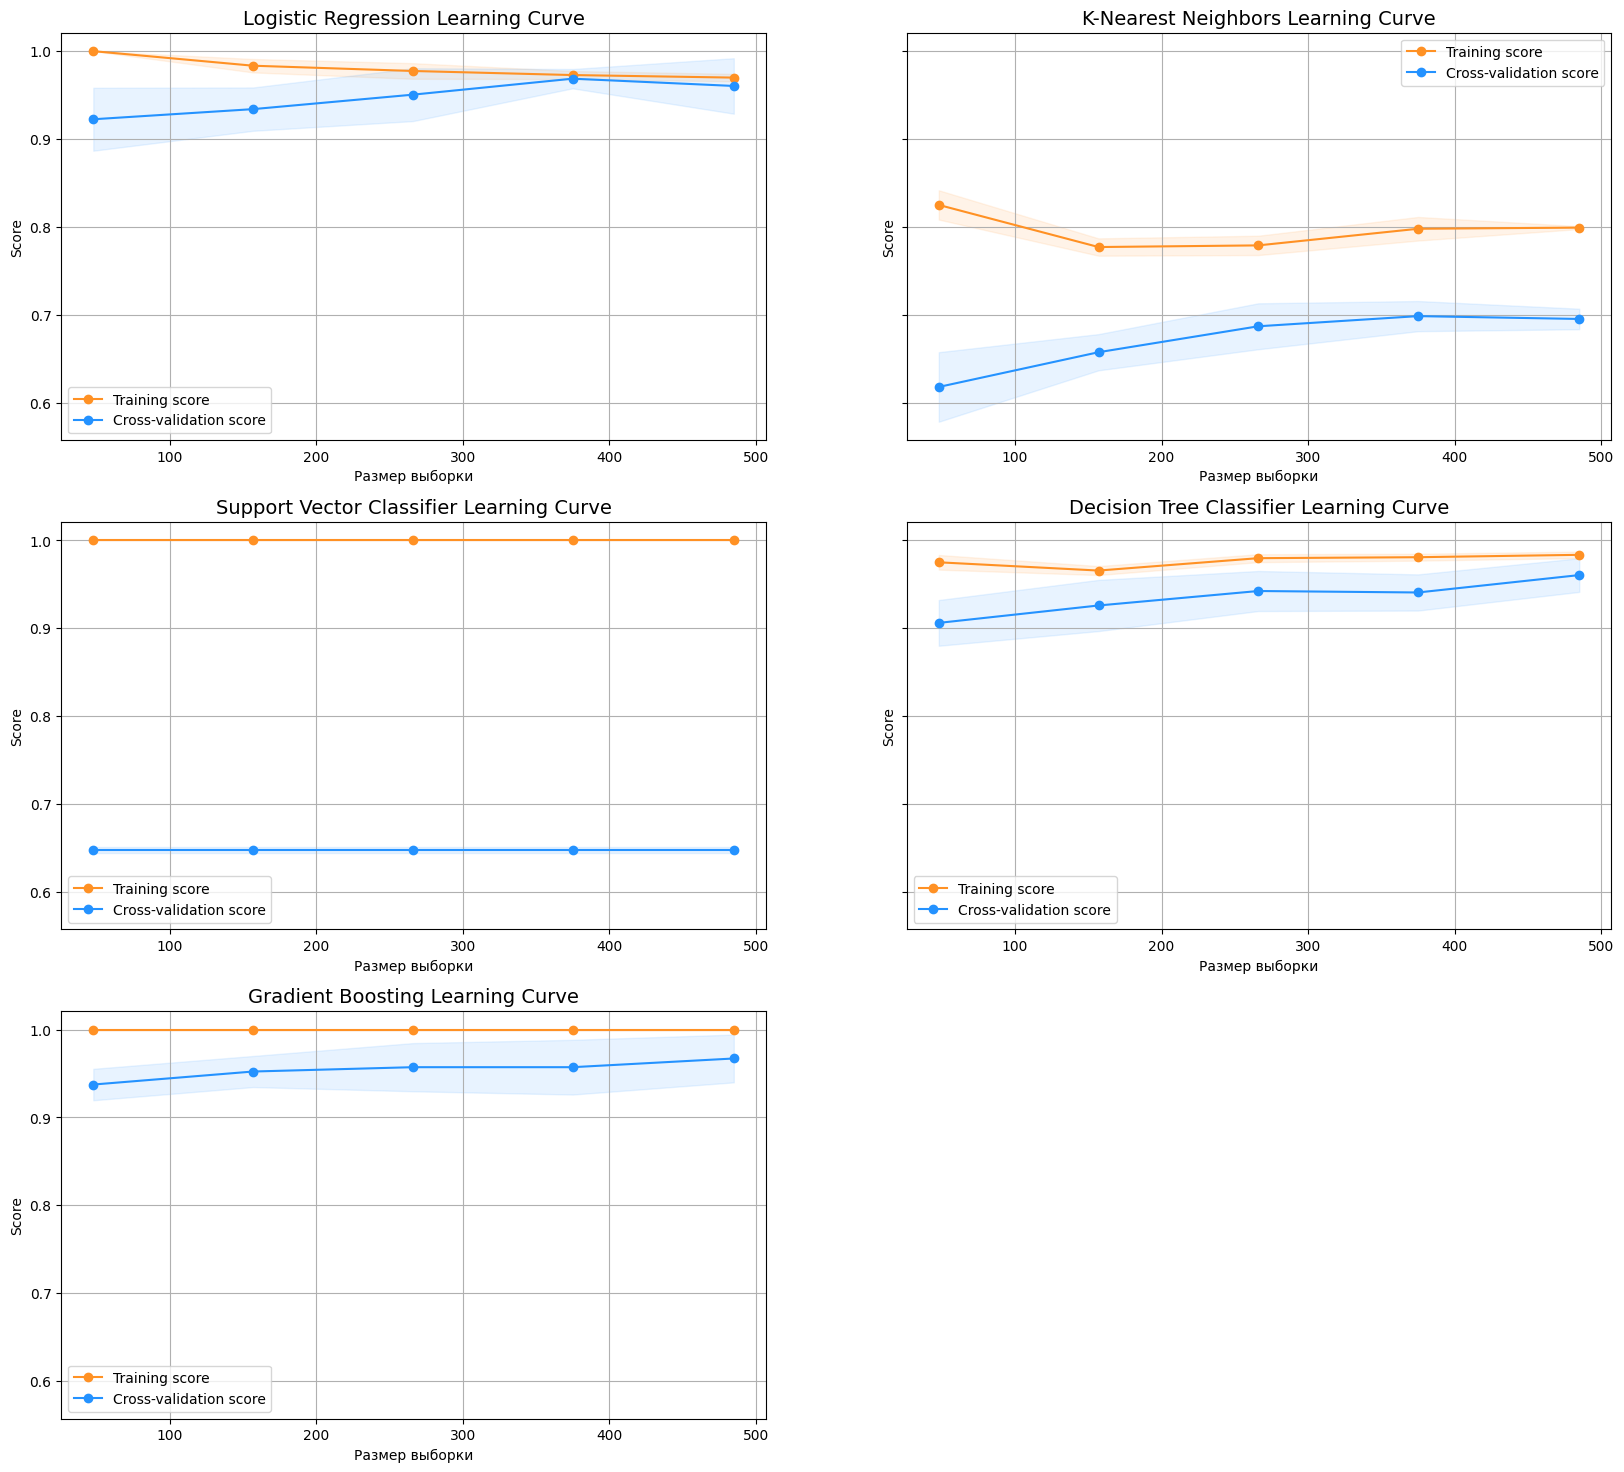

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curves(log_reg, knears_neighbors, svc, tree_clf,gboost, X_train, y_train)

## Кривые обучения:
<ul>
<li>Чем больше разрыв между результатами обучения и результатами кросс-валидации, тем больше вероятность того, что модель переобучилась (большой разброс).</li>
<li> Если результаты низкие как на обучающем, так и на кросс-валидационном наборе, это указывает на то, что наша модель недообучилась (большое смещение).</li>
<li>Логистическая регрессия показала себя лучше остальных.</li>
<li>Градиентный бустинг вышел лучше логистической модели.</li>
</ul>

In [ ]:
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

gboost_pred = cross_val_predict(gboost, X_train, y_train, cv=5)

In [ ]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('Gradient Boosting: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9871346698057121
KNears Neighbors:  0.6912023495279542
Support Vector Classifier:  0.5185548500630187
Decision Tree Classifier:  0.9541509119878243
Gradient Boosting:  0.9541509119878243


Построим roc-кривую и посчитаем площадь под ней.

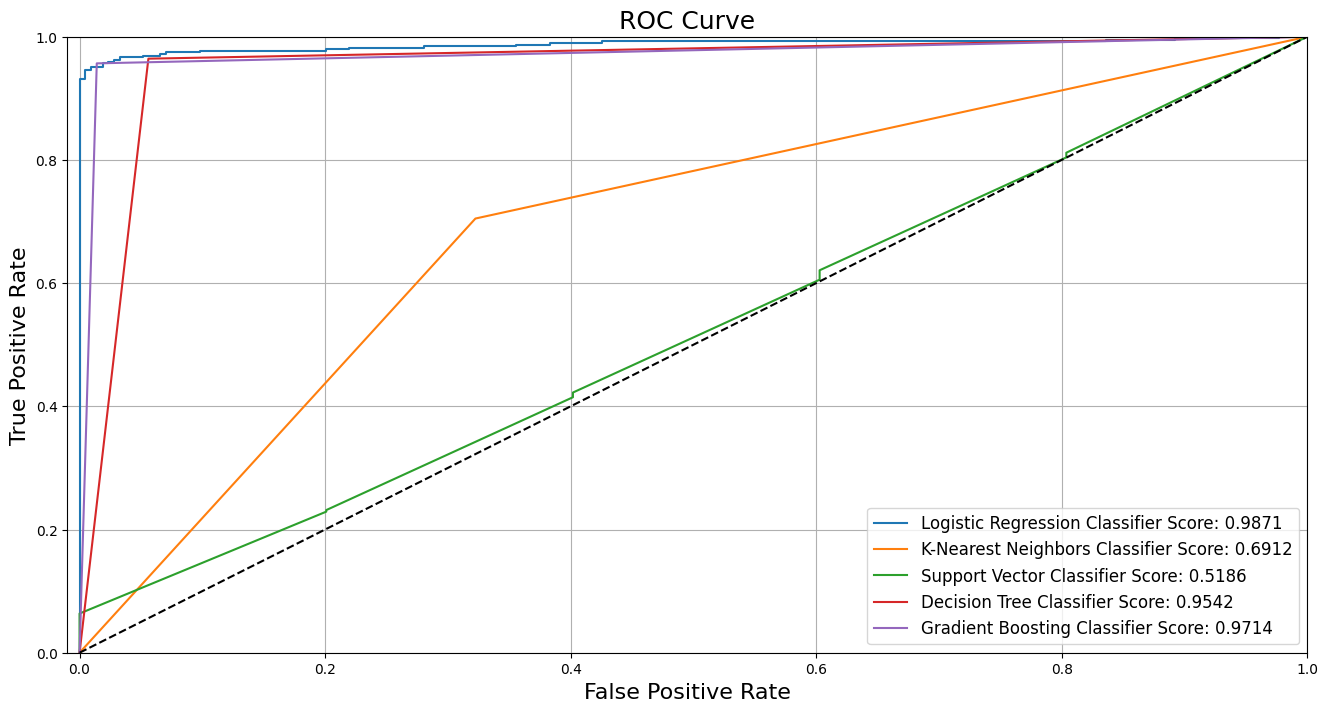

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)#
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)#
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)#
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)#
gbc_fpr, gbc_tpr, gbc_threshold = roc_curve(y_train, gboost_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, gbc_fpr, gbc_tpr):
    plt.figure(figsize=(16, 8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='K-Nearest Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier Score: {:.4f}'.format(roc_auc_score(y_train, gboost_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, gbc_fpr, gbc_tpr)
plt.show()

### SMOTE метод (Over-Sampling):

<b>SMOTE</b> означает Synthetic Minority Over-sampling Technique.  В отличие от Random Under-Sampling, SMOTE создает новые синтетические точки для того, чтобы создать баланс классов. Это еще одна альтернатива для решения проблемы дисбаланса классов. <br><br>


<b> Принцип работы SMOTE: </b>
<ul>
<li><b>Генерация синтетических точек: </b> SMOTE выбирает расстояние между ближайшими соседями меньшего класса и между ними создает синтетические точки. </li>
<li> <b>Преимущество:  </b> Сохраняется больше информации, поскольку нам не пришлось удалять данные, в отличие от under-sampling.</li>
</ul>

### Правильное использование SMOTE
Если мы создадим синтетические точки перед кросс-валидацией, мы окажем определенное влияние на тестовое выборку. Но тестовая выборка не должна быть тронута! По этой причине мы должны создавать синтетические точки данных во время кросс-валидации, а не до нее.

Попробуем в качестве алгоритм подбора гиперпараметров случайный поиск. Он работает быстрее, чем поиск по сетке.

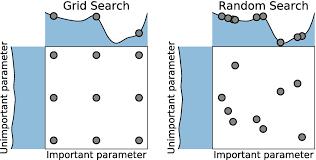

In [ ]:
# Берем кусок кода из предыдущего блокнота



from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)


original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.fit_transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.fit_transform(original_Xtest['Time'].values.reshape(-1,1))

original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Распределение классов: 

Обучающий набор: [0.99826637 0.00173363]
Тестовый набор: [0.99829711 0.00170289]


In [ ]:
# сохраним параметры наших классификаторов, на которых они показали лучших результат с GridSearchCV

#dictionary of classifiers objects which we got in the above cell via GridSearchCV
#with the tuned parameters
tuned_classifiers = {
    "LogisiticRegression": log_reg,
    "Knears Neighbors": knears_neighbors,
    "Support Vector Classifier": svc,
    "DecisionTreeClassifier": tree_clf
}

#Making our Classifiers train with the tuned parameters
for key, classifier in tuned_classifiers.items():
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'{key} Cross Validation Score: {round(score.mean() * 100, 2)}%')

LogisiticRegression Cross Validation Score: 96.54%
Knears Neighbors Cross Validation Score: 69.52%
Support Vector Classifier Cross Validation Score: 64.74%
DecisionTreeClassifier Cross Validation Score: 95.72%


In [ ]:
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Machine learning Pipeline libraries
from imblearn.pipeline import Pipeline



# here we are using the imbalanced dataset
X = df.drop('Class', axis=1)
y = df['Class']



# StratifiedKFold is used for cross validation
# This cross-validation object is a variation of KFold that returns stratified folds.
# The folds are made by preserving the percentage of samples for each class.
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# creating the object for Over Sampling the minority class
over = SMOTE(sampling_strategy=0.01,k_neighbors=5)

# creating the object for Under Sampling the majority class
under = RandomUnderSampler(sampling_strategy=0.5)

# iterating thru the dictionary of tuned classifiers
for key, classifier in tuned_classifiers.items():

    # list of steps to be provided to the ML Pipeline
    steps=[('o',over),('u',under),('model',classifier)]

    # Creating a ML Pipeline
    FiPipeline=Pipeline(steps=steps)

    # Cross validating the classifiers
    scores=cross_val_score(FiPipeline,X,y,cv=sss)

    # Printing the mean accuracy score
    print(f"Classifiers: {key} Has a training score of, {round(scores.mean() * 100, 2)} % accuracy score")

Classifiers: LogisiticRegression Has a training score of, 98.57 % accuracy score
Classifiers: Knears Neighbors Has a training score of, 91.03 % accuracy score
Classifiers: Support Vector Classifier Has a training score of, 99.83 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of, 98.39 % accuracy score


In [ ]:
# taking a fold of a data to do GridSearchCV for best parameters for SMOTE
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# creating a ML pipeline
model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.01)),
        ('Random',RandomUnderSampler(sampling_strategy=0.5)),
        ('classification', log_reg)
    ])

# Running GridSearchCV on our ML pipeline by varying the k_neighbors from 1 to 10
# to find the best k_neighbors parameter value
# NOTE :- in paramgrid use above key + 2 _ followed by parameter
SMOTE_KN = GridSearchCV(model,{'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN.fit(original_Xtrain,original_ytrain)

print(SMOTE_KN.best_estimator_)
print(SMOTE_KN.best_score_)
print(SMOTE_KN.best_params_)

# Training logistic regression classifier using SMOTE best parameter value for k_neighbors parameter
log_reg_score = cross_val_score(SMOTE_KN.best_estimator_, original_Xtrain, original_ytrain, cv=5)

# printing the mean accuracy score
print(f'Logistic Regression Cross Validation Score: {round(log_reg_score.mean() * 100, 2)}%')

Pipeline(steps=[('sampling', SMOTE(k_neighbors=6, sampling_strategy=0.01)),
                ('Random', RandomUnderSampler(sampling_strategy=0.5)),
                ('classification', LogisticRegression(C=1000))])
0.9873949948254566
{'sampling__k_neighbors': 6}
Logistic Regression Cross Validation Score: 98.75%


In [ ]:
labels = ['Non Fraud', 'Fraud']

best_est = SMOTE_KN.best_estimator_
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

   Non Fraud       1.00      0.99      0.99     56863
       Fraud       0.12      0.88      0.21        98

    accuracy                           0.99     56961
   macro avg       0.56      0.93      0.60     56961
weighted avg       1.00      0.99      0.99     56961



In [ ]:
y_score = best_est.decision_function(original_Xtest)

In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Применим SMOTE после кросс-валидации
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [ ]:
# Обучим логистическую регрессию
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 7.502547025680542 сек


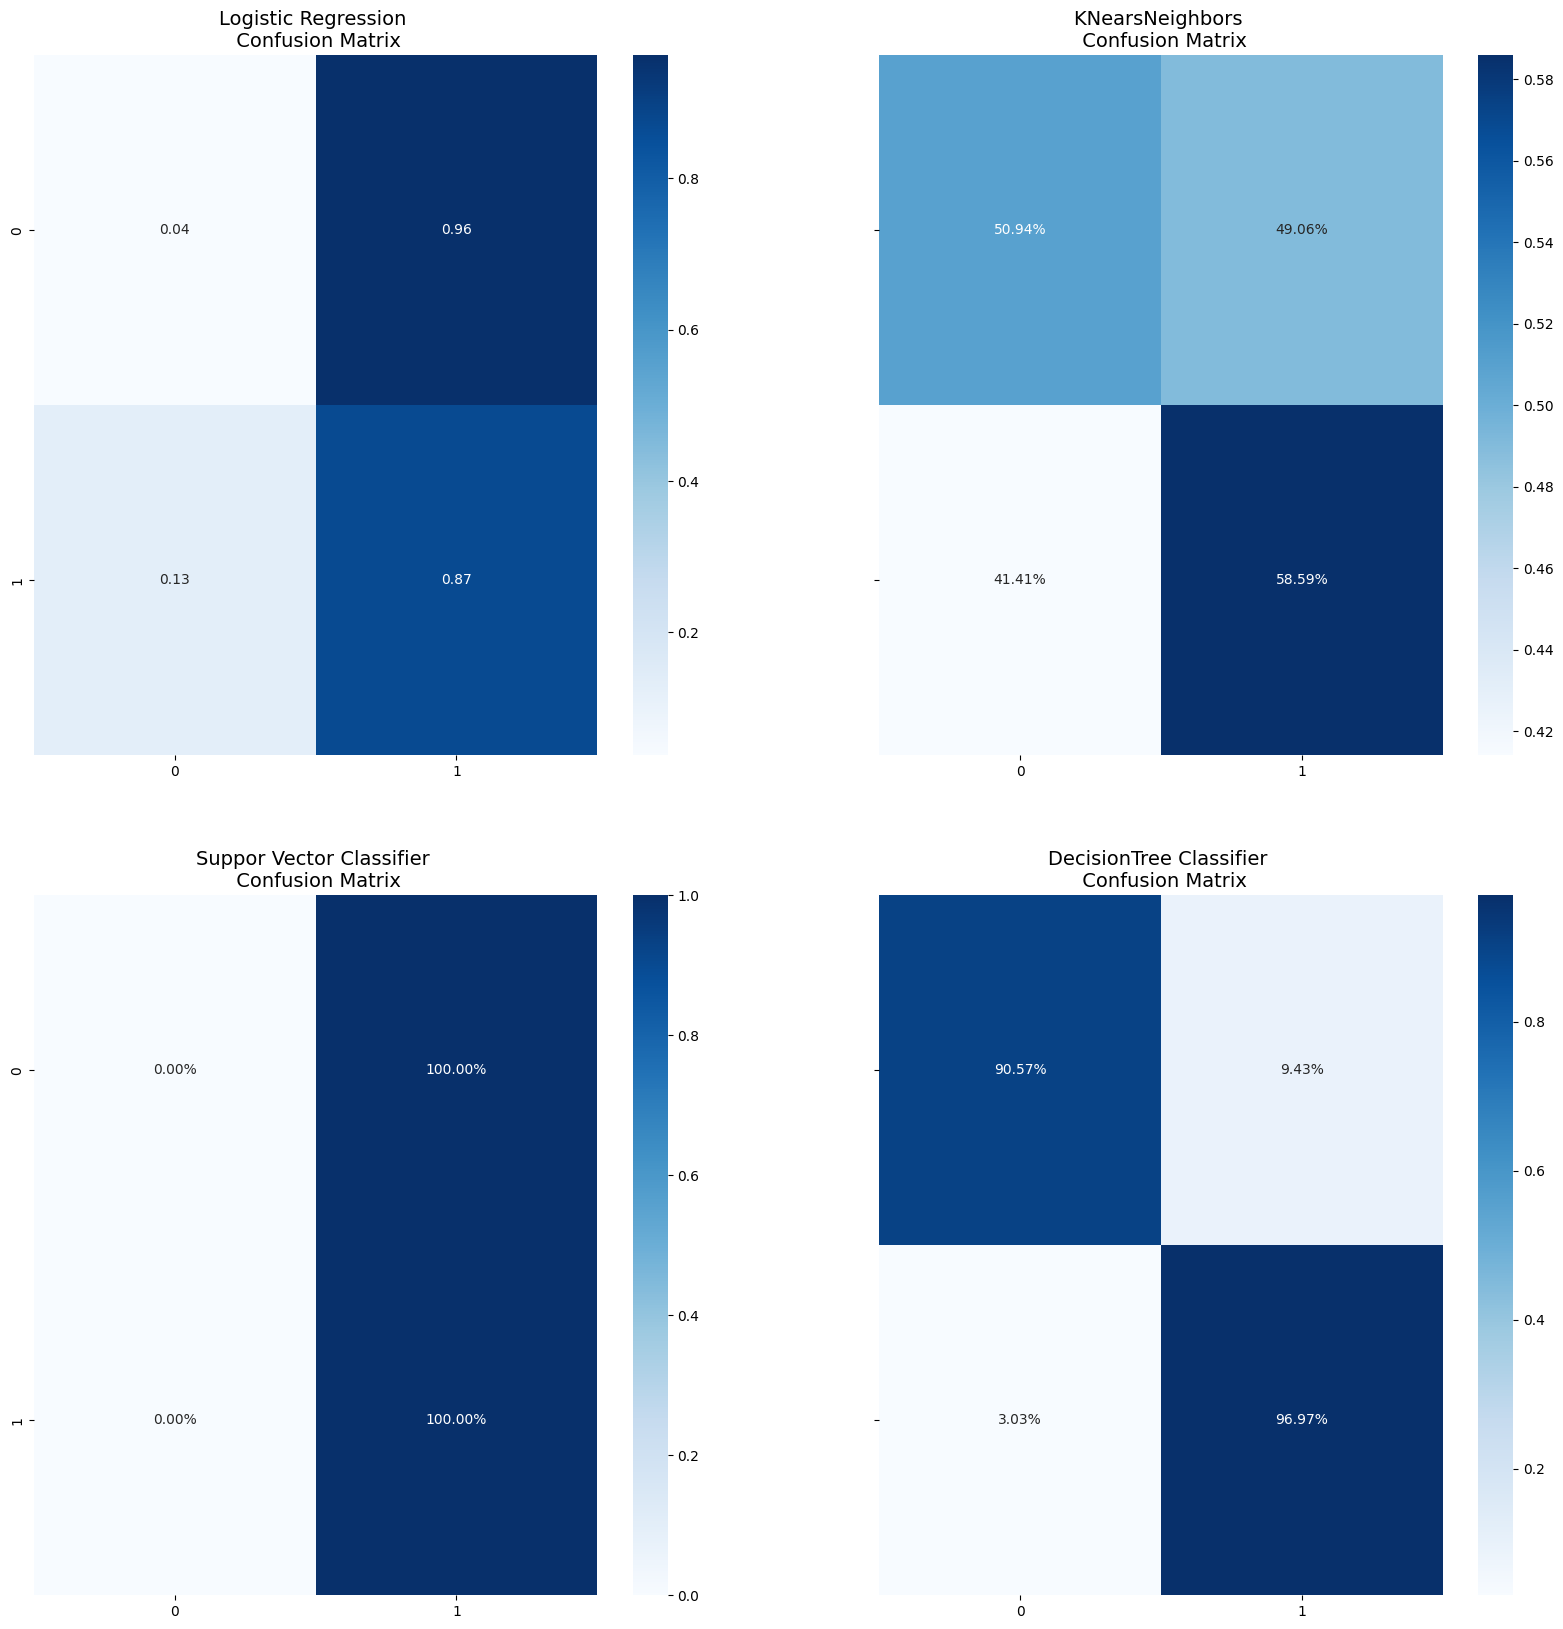

In [ ]:
y_pred_log_reg = best_est.predict(X_test)

# Другие модели
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg, normalize='true')
kneighbors_cf = confusion_matrix(y_test, y_pred_knear, normalize='true')
svc_cf = confusion_matrix(y_test, y_pred_svc, normalize='true')
tree_cf = confusion_matrix(y_test, y_pred_tree, normalize='true')

fig,  ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,20), sharey=True)
# Построим матрицы ошибок
sns.heatmap(ax=ax1, data=log_reg_cf, annot=True, fmt='.2f', cmap='Blues')
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax2,data=kneighbors_cf, annot=True, fmt='.2%', cmap='Blues')
ax2.set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)


#
sns.heatmap(ax=ax3, data=svc_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax3.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)



#
sns.heatmap(ax=ax4, data=tree_cf, annot=True,
            fmt='.2%', cmap='Blues')
ax4.set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)


plt.show()

Выведем основные метрики моделей.

Давайте вспомним основные метрики качества классификации на примере нашей задачи:

* **Confusion matrix** : так же известна как матрица ошибок, состоит из 4 частей:

    * true positive (TP) : транзакция была мошеннической и модель предсказала ее как мошенническую
    * true negative (TN) : транзакция была нормальной и модель определила ее как нормальную
    * false positive (FP) : транзакция была нормальная, но модель среагировала на нее как на мошенническую
    * false negative (FN) : транзакция была мошенническая, но модель ее пропустила и посчитала нормальной


* **Метрики** :

    * Accuracy : (TP +TN) / (TP + TN + FP +FN)
    * Precision : TP / (TP + FP) (подходит при дисбалансе)
    * Recall : TP / (TP + FN) (подходит при дисбалансе)
    * F1 score : 2 x ((Precision x Recall) / (Precision + Recall)) (подходит при дисбалансе)

* **Roc-кривая** : ROC-кривая строится путем отрисовки графика зависимости частоты истинных положительных результатов (TPR) от частоты ложных положительных результатов (FPR) при различных пороговых значениях.

In [ ]:
from sklearn.metrics import classification_report



print('Logistic Regression:')
#
y_pred=  best_est.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('KNears Neighbors:')
#
y_pred=  knears_neighbors.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Support Vector Classifier:')
#
y_pred=  svc.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('Decision Tree Classifier:')
#
y_pred=  tree_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))



Logistic Regression:
              precision    recall  f1-score   support

   Non Fraud       1.00      0.99      0.99     56863
       Fraud       0.12      0.88      0.21        98

    accuracy                           0.99     56961
   macro avg       0.56      0.93      0.60     56961
weighted avg       1.00      0.99      0.99     56961

KNears Neighbors:
              precision    recall  f1-score   support

   Non Fraud       1.00      0.67      0.80     56863
       Fraud       0.00      0.59      0.01        98

    accuracy                           0.67     56961
   macro avg       0.50      0.63      0.40     56961
weighted avg       1.00      0.67      0.80     56961

Support Vector Classifier:
              precision    recall  f1-score   support

   Non Fraud       0.00      0.00      0.00     56863
       Fraud       0.00      1.00      0.00        98

    accuracy                           0.00     56961
   macro avg       0.00      0.50      0.00     56961
weighted

Поскольку мы выбрали Decision Tree Classifier в качестве основной модели, давайте сравним ее качество в случае подхода under-sampling и в случае over-sampling.

In [ ]:
# Логистическая регрессия с under-sampling
y_pred = log_reg.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)

# Логистическая регрессия с over-sampling
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Метод,Score
0,Random Under-Sampling,0.983971
1,Oversampling (SMOTE),0.988396


Итак, в данной задаче более оптимальным подходом оказался over-samplimg методом SMOTE.

# Свой метод балансировки

GANs (Generative Adversarial Networks)

Основная идея GANs
GANs состоят из двух нейронных сетей:

Генератор (Generator): создаёт синтетические данные.
Дискриминатор (Discriminator): определяет, являются ли данные настоящими или синтетическими.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Генератор
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim)
        )

    def forward(self, x):
        return self.model(x)


# Дискриминатор
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


Подключаем несбалансированные данные в тестовую и обучающую выборку

In [ ]:
rob_scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify = y)

X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['scaled_amount'] = rob_scaler.fit_transform(X_test['Amount'].values.reshape(-1,1))

X_train['scaled_time'] = rob_scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['scaled_time'] = rob_scaler.fit_transform(X_test['Time'].values.reshape(-1,1))

# удаляем из трейн и тест датасетов  столбцы Time и Amount,
# так как у нас уже есть их отмасштабированные версии
X_train.drop(['Time','Amount'], axis=1, inplace=True)
X_test.drop(['Time','Amount'], axis=1, inplace=True)

# Переводим данные в массив для подачи в классификатор
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Инициализация моделей

In [ ]:
input_dim = X_train.shape[1]
latent_dim = 200  # Размер латентного пространства

generator = Generator(input_dim=latent_dim, output_dim=input_dim)
discriminator = Discriminator(input_dim=input_dim)

# Оптимизаторы
lr = 0.0002
gen_optimizer = optim.Adam(generator.parameters(), lr=lr)
disc_optimizer = optim.Adam(discriminator.parameters(), lr=lr)

# Функция потерь
criterion = nn.BCELoss()


Подготовка данных

In [ ]:
# Отбираем только миноритарный класс
minority_class_indices = np.where(y_train == 1)[0]
X_minority = X_train[minority_class_indices]

# Перевод данных в формат PyTorch
minority_dataset = DataLoader(TensorDataset(torch.tensor(X_minority, dtype=torch.float32)), batch_size=64, shuffle=True)


Обучение GAN

In [ ]:
epochs = 800
latent_dim = 200

for epoch in range(epochs):
    for batch in minority_dataset:
        real_data = batch[0]
        batch_size = real_data.size(0)

        # Метки для реальных и синтетических данных
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # === Обучение дискриминатора ===
        # Реальные данные
        outputs = discriminator(real_data)
        real_loss = criterion(outputs, real_labels)

        # Синтетические данные
        noise = torch.randn(batch_size, latent_dim)
        fake_data = generator(noise)
        outputs = discriminator(fake_data.detach())
        fake_loss = criterion(outputs, fake_labels)

        # Итоговая ошибка дискриминатора
        disc_loss = real_loss + fake_loss
        disc_optimizer.zero_grad()
        disc_loss.backward()
        disc_optimizer.step()

        # === Обучение генератора ===
        noise = torch.randn(batch_size, latent_dim)
        fake_data = generator(noise)
        outputs = discriminator(fake_data)
        # === Функция потерь WGAN для генератора ===
        gen_loss = -torch.mean(discriminator(generator(noise)))

        gen_optimizer.zero_grad()
        gen_loss.backward()
        gen_optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Generator Loss: {gen_loss.item()}, Discriminator Loss: {disc_loss.item()}")


Epoch 0, Generator Loss: -0.4951586127281189, Discriminator Loss: 100.68424224853516
Epoch 100, Generator Loss: -0.7904664278030396, Discriminator Loss: 4.100473403930664
Epoch 200, Generator Loss: -0.8873249888420105, Discriminator Loss: 15.90492057800293
Epoch 300, Generator Loss: -0.6331914663314819, Discriminator Loss: 3.306863784790039
Epoch 400, Generator Loss: -0.755491316318512, Discriminator Loss: 2.128549814224243
Epoch 500, Generator Loss: -0.5291756987571716, Discriminator Loss: 0.7847788333892822
Epoch 600, Generator Loss: -0.3863137364387512, Discriminator Loss: 0.5776827335357666
Epoch 700, Generator Loss: -0.34374484419822693, Discriminator Loss: 0.6266375780105591


Создание синтетических данных

In [ ]:
# Подсчёт количества примеров для каждого класса
from collections import Counter

class_counts = Counter(y_train)
majority_class = max(class_counts, key=class_counts.get)
minority_class = min(class_counts, key=class_counts.get)

# Разница между мажоритарным и миноритарным классами
num_samples_to_generate = class_counts[majority_class] - class_counts[minority_class]
print(f"Синтетических примеров для генерации: {num_samples_to_generate}")

# Генерация новых примеров для миноритарного класса
noise = torch.randn(num_samples_to_generate, latent_dim)
synthetic_data = generator(noise).detach().numpy()

# Объединение с оригинальными данными
X_balanced = np.vstack([X_train, synthetic_data])
y_balanced = np.hstack([y_train, np.ones(num_samples_to_generate)])  # Метки для синтетических данных = 1

# Проверяем итоговое распределение классов
print("Распределение классов после балансировки:")
print(Counter(y_balanced))


Синтетических примеров для генерации: 227057
Распределение классов после балансировки:
Counter({0.0: 227451, 1.0: 227451})


Распределение классов

Распределение классов до балансировки:
Counter({0: 227451, 1: 394})

Распределение классов после балансировки:
Counter({0.0: 227451, 1.0: 227451})


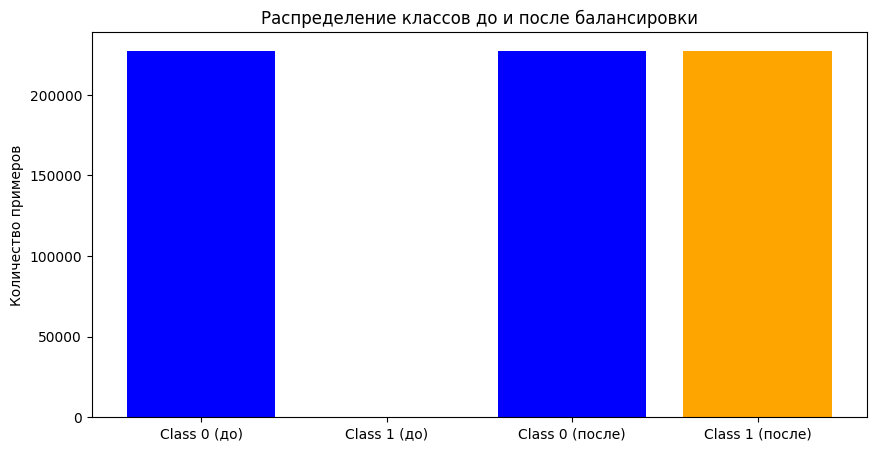

In [ ]:
from collections import Counter

# До балансировки
print("Распределение классов до балансировки:")
print(Counter(y_train))

# После балансировки
print("\nРаспределение классов после балансировки:")
print(Counter(y_balanced))

# Визуализация
plt.figure(figsize=(10, 5))
plt.bar(['Class 0 (до)', 'Class 1 (до)', 'Class 0 (после)', 'Class 1 (после)'],
        [Counter(y_train)[0], Counter(y_train)[1], Counter(y_balanced)[0], Counter(y_balanced)[1]],
        color=['blue', 'orange', 'blue', 'orange'])
plt.title('Распределение классов до и после балансировки')
plt.ylabel('Количество примеров')
plt.show()


Посмотрим матрицу ошибок и другие параметры качества модели


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45405
         1.0       1.00      1.00      1.00     45576

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981


Confusion Matrix:


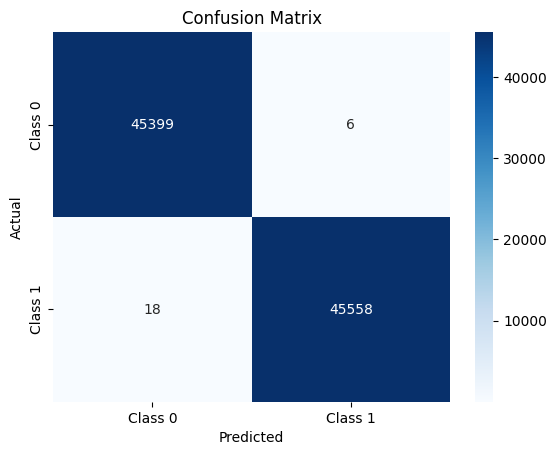


ROC-AUC Score: 0.9999


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Разделение сбалансированных данных
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Предсказания
y_pred = model.predict(X_test_balanced)

# Метрики
print("\nClassification Report:")
print(classification_report(y_test_balanced, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_balanced, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC
y_pred_proba = model.predict_proba(X_test_balanced)[:, 1]
roc_auc = roc_auc_score(y_test_balanced, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")


Анализ синтетических данных

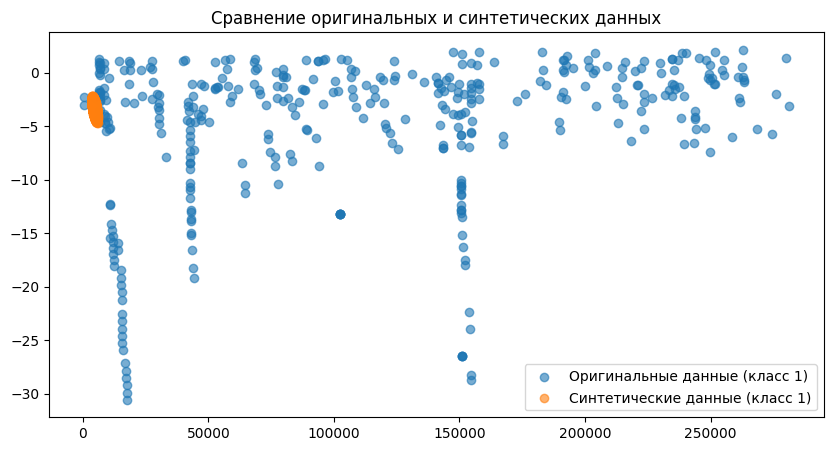

In [ ]:
# Пример для визуализации первых двух признаков
plt.figure(figsize=(10, 5))

# Оригинальные данные миноритарного класса
plt.scatter(X_minority[:, 0], X_minority[:, 1], label="Оригинальные данные (класс 1)", alpha=0.6)

# Синтетические данные
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], label="Синтетические данные (класс 1)", alpha=0.6)

plt.title('Сравнение оригинальных и синтетических данных')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Обучение логистической регрессии на сбалансированных данных
log_reg_gan = LogisticRegression()
log_reg_gan.fit(X_train_balanced, y_train_balanced)

# Предсказания на тестовой выборке
y_pred_gan = log_reg_gan.predict(X_test)

# Оценка accuracy
gan_accuracy = accuracy_score(y_test, y_pred_gan)

# Сравнение метрик
results = {
    'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)', 'GANs (Generative Adversarial Networks)'],
    'Accuracy': [undersample_score, oversample_score, gan_accuracy]
}

# Создание DataFrame с результатами
final_df = pd.DataFrame(data=results)

final_df


                                    Метод  Accuracy
0                   Random Under-Sampling  0.983971
1                    Oversampling (SMOTE)  0.988396
2  GANs (Generative Adversarial Networks)  0.999122


Вывод:

Метод GANs (Generative Adversarial Networks) оказался лучше изложенных до этого методов Random Under-Sampling и Oversampling (SMOTE)